# Лабораторная работа №7 Метод KNN


## Сонарные данные

### Определение камня или мины

Сонар (ультразвуковой локатор) - это техника использования звука для навигации, коммуникации с объектами и определения объектов на воде или под водой, например морских судов.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

Данный набор данных содержит ответные метрики для 60 различных частот сонара, отправленных на известные объекты - мины и камни. Для каждого отправленного и полученного сигнала были записаны данные об объекте, на который направлялся сонар (мина или камень). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Наша цель - создать модель машинного обучения, которая может определить тип объекта - мина или камень - на основе ответа от сонаров на 60 различных частотах.


Источник данных: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)


In [4]:
# импорт
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Исследование данных

**ЗАДАНИЕ: Нарисуйте тепловую карту heatmap, показывающую корреляцию между откликами на различных частотах.**

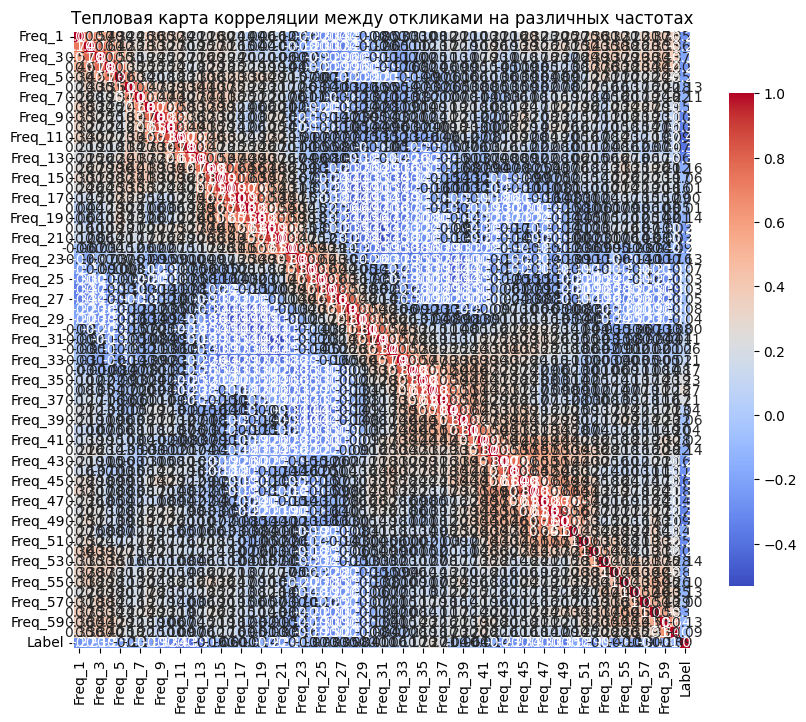

In [10]:
temp = df.copy()
temp['Label'] = temp['Label'].map({'R':1, 'M':0})
corr_mat = temp.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляции между откликами на различных частотах')
plt.show()

**ЗАДАНИЕ: Какие 5 частот лучше всего коррелируют с целевой переменной?**

*Замечание: Вы можете пометить целевую переменную с помощью значений 0 и 1.*

*Замечание 2: мы ищем **абсолютные** значения корреляции.*

In [11]:
# Извлекаем корреляции с целевой переменной
target_correlation = corr_mat['Label'].drop('Label')

# Находим 5 частот с наибольшими абсолютными значениями корреляции
top_5_frequencies = target_correlation.abs().nlargest(5)

print("5 частот с наибольшей корреляцией с целевой переменной:")
print(top_5_frequencies)

5 частот с наибольшей корреляцией с целевой переменной:
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Label, dtype: float64


## Разбиение на обучающий и тестовый наборы данных

Здесь мы будем использовать кросс-валидацию на 90% данных, и затем оценим результаты работы нашей модели на тестовом наборе данных в 10%.

**ЗАДАНИЕ: Разделите данные на признаки и целевую переменную, а затем разбейте все данные на обучающий и тестовый наборы данных, в отношении 90% и 10%.**

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [18]:
X = df.drop('Label', axis=1)
y = df['Label']

Проведите масштабирование данных

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Вызовите модель KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)
print(f"Точность модели на тестовом наборе данных: {accuracy:.2f}")

Точность модели на тестовом наборе данных: 0.95


Выполните поиск по сетке для различных значений k, и выведите наилучшие параметры

In [23]:
param_grid = {'n_neighbors': list(range(1, 21))}

In [35]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [27]:
best_k = grid_search.best_params_['n_neighbors']
print(f"Наилучшее значение k: {best_k}")

Наилучшее значение k: 1


In [28]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

Создайте финальный отчёт "classification report" и матрицу "confusion matrix"

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print("Отчёт классификации:")
print(classification_report(y_test, y_pred))

Отчёт классификации:
              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [33]:
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Матрица ошибок:
[[12  1]
 [ 1  7]]


Выводы:

- **Точность** (`precision`): **92%** для класса `M` и **88%** для класса `R`, что указывает на высокую надежность модели в правильной классификации обоих классов.
- **Полнота** (`recall`): Модель также демонстрирует высокую полноту для обоих классов (**92%** для `M` и **88%** для `R`), показывая хорошее распознавание объектов каждого класса.
- `F1-score`: Средние значения $F1-score$ для обоих классов также остаются высокими (**0.90**), подтверждая общий баланс между точностью и полнотой модели.

**Матрица ошибок**: Модель правильно классифицировала **12** объектов как `M` и **7** объектов как `R`. Всего две ошибки — **один** объект класса `M` и **один** объект класса `R` были неверно классифицированы, что подтверждает эффективность модели с минимальным количеством ошибок